In [1]:
import numpy as np
import matplotlib.pyplot as pl
import audacity
import TransferFunctions as tf
import scipy.signal as sig

%matplotlib notebook

In [2]:
au = audacity.Aup('transfer/b-foot/2201_closing_2.aup')

In [3]:
rdata = []
maxl = 0
for ii in range(au.nchannels):
    rdata.append(au.get_channel_data(ii))
    print('Channel %d: %d samples'%(ii,len(rdata[-1])))
    maxl = max(maxl,len(rdata[-1]))

data = np.zeros((maxl,len(rdata)))
for ii,rd in enumerate(rdata):
    data[:len(rd),ii]=rd

Channel 0: 2653884 samples
Channel 1: 2660352 samples
Channel 2: 2660352 samples
Channel 3: 2660352 samples


<IPython.core.display.Javascript object>


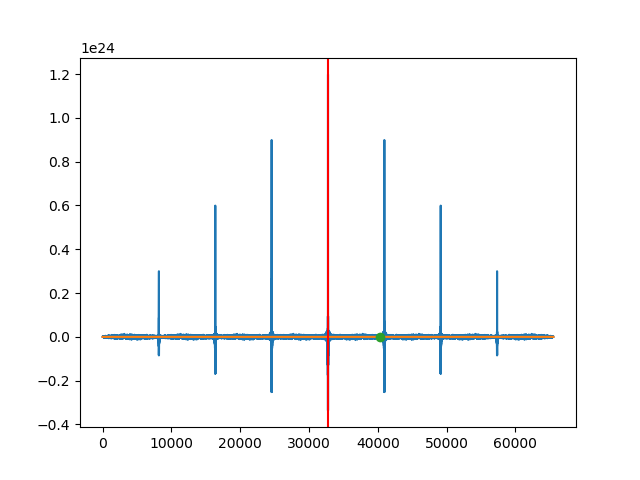

Delay: 7496 samples


In [4]:
# Check for delay between loudspeaker output (ch 0) and external mic inputs (ch 2)

fig,ax=pl.subplots(1)
delay=tf.determineDelay(data[:,0]/np.mean(data[:,0]),data[:,2]/np.mean(data[:,2]),maxdel=2**15,ax=ax)
print("Delay: %d samples"%delay)

Remove the delay by circular-shifting

In [5]:
data[:,0]=np.roll(data[:,0],delay)

Check that the shift was in the right direction

<IPython.core.display.Javascript object>


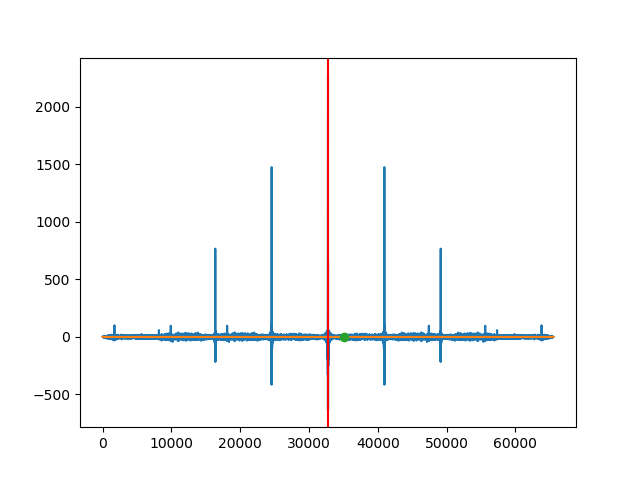

Delay: 2290 samples


In [6]:
fig,ax=pl.subplots(1)
delay=tf.determineDelay(data[:,0],data[:,1],maxdel=2**15,ax=ax)
print("Delay: %d samples"%delay)

Calulate transfer functions 

<IPython.core.display.Javascript object>


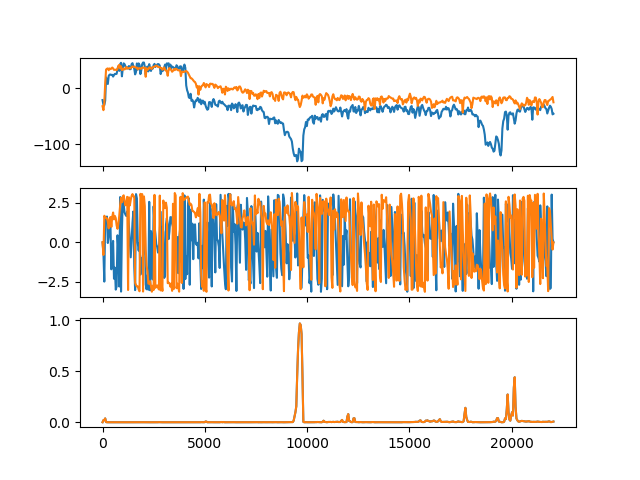

In [7]:
fig,ax = pl.subplots(3,sharex=True)

sr=au.rate
nfft=1024
for ii in range(1,3):
    tfxy,ff=tf.tfe(data[:,0],data[:,ii],Fs=sr,NFFT=nfft)
    ax[0].plot(ff,20*np.log10(np.abs(tfxy)))
    ax[1].plot(ff,(np.angle(tfxy)))
    ff,coh=sig.coherence(data[:,1],data[:,2],fs=sr,nperseg=nfft)

    ax[2].plot(ff,coh)
    

<IPython.core.display.Javascript object>


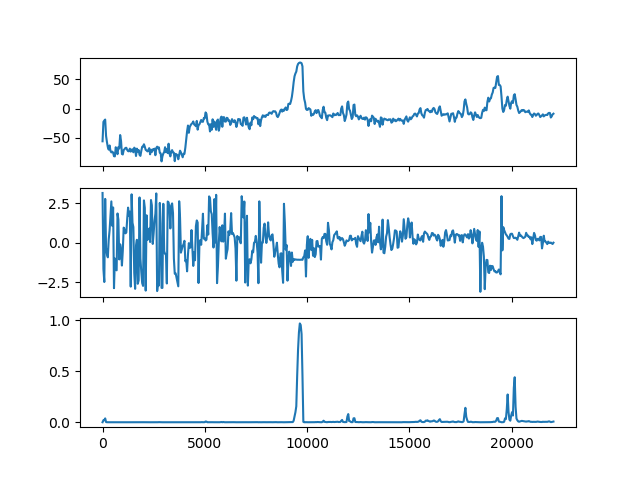

In [8]:
fig,ax = pl.subplots(3,sharex=True)

sr=au.rate
nfft=1024
tfxy,ff=tf.tfe(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
ax[0].plot(ff,20*np.log10(np.abs(tfxy)))
ax[1].plot(ff,(np.angle(tfxy)))
#coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
ff,coh=sig.coherence(data[:,1],data[:,2],fs=sr,nperseg=nfft)
ax[2].plot(ff,coh)
